# Prediction of Colon Polyp images using resnet-50-based classifier


The script is a basic aplication of the best model for colon polyp detection using **Fastai**. The model has an **accuracy of 0.99** obtained with **resnet-50** transfer learning fine-tuning: [Fastai-Colon-Polyps_ACC.ipynb](https://github.com/muntisa/Fastai-Colon-Polyps/blob/master/Fastai-Colon-Polyps_ACC.ipynb).

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

I used preinstalled fastai and pytorch from colab:

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

I connected the dataset from my google drive to colab or change the code for other source. If you will have the dataset on gdrive, you will need to authorize a link:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Now I have *My Drive* with the project folder and I will save it as *path* variable. If you have the dataset into another location, please change the path.

In [0]:
path_test = "/content/drive/My Drive/myAI-Projects/Colonoscopy-polyps-detection-with-CNNs/test"
path = "/content/drive/My Drive/myAI-Projects/Colonoscopy-polyps-detection-with-CNNs/data_polyps"

Definition of the list of classes used by the pre-trained model:

In [0]:
classes= ['non_polyps', 'polyps']

Create an empty set of data just to be able to make inference:

In [0]:
data2 = ImageDataBunch.single_from_classes(path, classes, size=299).normalize(imagenet_stats)

Create a learner based on **resnet-50** topology and load the best model weights from path:

In [7]:
learn = cnn_learner(data2, models.resnet50)
learn.load(path+'/polyp-resnet50-fine-tuning_ACC-0.99')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 87726708.15it/s]


Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/drive/My Drive/myAI-Projects/Colonoscopy-polyps-detection-with-CNNs/data_polyps;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/drive/My Drive/myAI-Projects/Colonoscopy-polyps-detection-with-CNNs/data_polyps;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): B

Now let's test one image with colon polyps from a test folder:

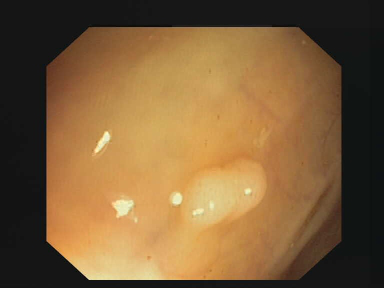

In [8]:
img = open_image('/content/drive/My Drive/myAI-Projects/Colonoscopy-polyps-detection-with-CNNs/test/29.jpg')
img

Predict the class and show on top of the image:

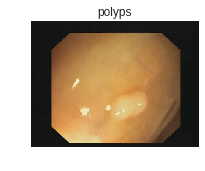

In [9]:
img.show(y=learn.predict(img)[0])

Let's see some details:

In [10]:
pred_class, pred_idx, outputs = learn.predict(img)
print("* Predicted class:",pred_class)

* Predicted class: polyps


In [11]:
print('* List with classes:', classes)
print('* Prediction probabilities by class:',outputs)

* List with classes: ['non_polyps', 'polyps']
* Prediction probabilities by class: tensor([0.0905, 0.9095])


Have fun with DL!

@[muntisa](https://sites.google.com/site/muntisa/)